<a href="https://colab.research.google.com/github/yooste/SOLUX_COVID_19/blob/main/python_data_analysis/05_pandas_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**pandas 라이브러리와 탐색적 데이터 분석 과정 익히기**

**1. 탐색적 데이터 분석 과정**
* EDA(Exploratory Data Analysis)라고 함
* 데이터분석을 위해 raw data를 다양한 각도에서 관찰하여, 데이터를 이해하는 과정
  * 데이터 분석 주제마다 EDA를 통해 진행하는 과정은 각양각색이므로, 정형화된 패턴은 없지만,
  * 크게 다음과 같은 3가지 과정은 기본이 될 수 있으므로 다음 3가지 과정을 기본으로 이해하기로 함
    1. 데이터의 출처와 주제에 대해 이해
    2. 데이터의 크기 확인
    3. 데이터 구성 요소(feature)의 속성(특징) 확인
      * feature: 데이터 구성 요소를 의미함
      * 예: 어떤 초등학교에 학생 성적을 기록한 데이터가 있다면, 학생 이름, 과목별 성적 등을 feature로 볼 수 있음(가볍게 field/column이라고 봐도 무방함)
  
  > 존 튜카라는 미국 통계학자가 제안한 분석 방법론
  
  > 기존 통계학이 가설을 세우고, 가설을 검정하는 방법론에 치우쳐, 데이터 본래의 정보를 파악하기 어려우므로, 본연의 데이터 탐색에 집중하자는 방법론



**2. 실제 데이터로 pandas 라이브러리와 탐색적 분석 과정 익히기**

코로나 바이러스 데이터와 함께 pandas 라이브러리 익히기
* COVID-19-master 폴더 확인
  * 데이터 다운로드: https://github.com/CSSEGISandData/COVID-19
  * 데이터 압축 풀고 COVID-19-master 폴더를 통째로 pandas_eda 주피터 노트북이 있는 폴더 안에 하위 폴더로 이동

pandas 라이브러리로 csv 파일 읽기
* csv 파일을 pandas dataframe 으로 읽기 위해 read_csv() 함수를 사용함
* csv 구분자는 quotechar=구분자 옵션을 넣어서 구분자가 다른 경우도 읽기 가능
  ```
  doc = pd.read_csv("파일명", encoding='utf-8-sig', quotechar=',')
  ```
* 에러 나는 데이터는 항상 있을 수 있음. 해당 데이터는 생략하는 것이 일반적임
  ```
  doc = pd.read_csv("파일명", encoding='utf-8-sig', error_bad_lines=False)
  ```


In [ ]:
import pandas as pd
doc = pd.read_csv("COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv",encoding='utf-8-sig')

**참고: pandas 라이브러리로 엑셀 파일 읽기**
* 엑셀 데이터 읽기 (맨 앞에 있는 쉬트의 데이터를 읽음)
  ``` 
  pd. read_excel("파일명")
  ```
* 특정 쉬트 데이터 읽기: sheet_name 옵션 사용해서, 엑셀 파일의 특정 쉬트를 명시적으로 지정 가능
  ```
  pd.read_excel(파일명, sheet_name=쉬트명)
  ```

**탐색적 데이터 분석: 1. 데이터의 출처와 주제에 대해 이해**
* 국가별 코로나 바이러스 daily 현황 자료
* Johns Hopkins University Center for Systems Science and Engineering(JHU CSSE)에서 작성
* 데이터 소스는 https://github.com/CSSEGISandData/COVID-19/tree/who_coivd_19_situation_reports 에 명시
  * 실제 데이터 분석에서는 raw data를 어떻게 가져왔는지에 대해서도 세세히 알 필요가 있을 때가 있음
    * PDF로 만들어진 공식 문서에서 추출한 데이터와 공식 웹페이지를 크롤링해서 얻은 자료를 CSV 파일로 생성한 것으로 보임
  * 위 데이터는 테스트용 데이터이므로 출처에 대해서는 이 정도만 파악하기로 함

**탐색적 데이터 분석: 2. 데이터의 크기 확인**


**1. 데이터를 pandas로 읽은 후, 가장 먼저 하는 일**
* 데이터 일부 확인하기
  * head(): 처음 5개(디폴트)의 데이터 확인하기
    * head(n=10): 처음 10개(조정 가능)의 데이터 확인하기
  * tail(): 마지막 5개의 데이터 확인하기
    * tail(n=10): 마지막 10개(조정 가능)의 데이터 확인하기

In [ ]:
doc.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [ ]:
doc.tail()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
2480,NaN,NaN,NaN,Venezuela,2020-04-01 21:58:34,6.423800,-66.589700,143,3,41,99,Venezuela
2481,NaN,NaN,NaN,Vietnam,2020-04-01 21:58:34,14.058324,108.277199,218,0,63,155,Vietnam
2482,NaN,NaN,NaN,West Bank and Gaza,2020-04-01 21:58:34,31.952200,35.233200,134,1,18,115,West Bank and Gaza
2483,NaN,NaN,NaN,Zambia,2020-04-01 21:58:34,-13.133897,27.849332,36,0,0,36,Zambia
2484,NaN,NaN,NaN,Zimbabwe,2020-04-01 21:58:34,-19.015438,29.154857,8,1,0,7,Zimbabwe


**2. 보다 다양한 데이터 정보 확인하기**
* shape: 데이터의 row, column 사이즈 확인
* info(): column별 데이터 타입과 실제 데이터가 있는 사이즈 확인
  * raw data는 일부 데이터가 없는 경우가 많기 때문에, 실제 데이터의 사이즈 확인이 필요함

In [ ]:
doc.shape

(2485, 12)

In [ ]:
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            2171 non-null   float64
 1   Admin2          2221 non-null   object 
 2   Province_State  2308 non-null   object 
 3   Country_Region  2485 non-null   object 
 4   Last_Update     2485 non-null   object 
 5   Lat             2484 non-null   float64
 6   Long_           2484 non-null   float64
 7   Confirmed       2485 non-null   int64  
 8   Deaths          2485 non-null   int64  
 9   Recovered       2485 non-null   int64  
 10  Active          2485 non-null   int64  
 11  Combined_Key    2485 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 233.1+ KB


**탐색적 데이터 분석: 3. 데이터 구성 요소(feature)의 속성(특징) 확인**

**1. 각 column 이해하기**
* raw data에는 다양한 column이 있는 경우가 많고, 이 중에서 내가 사용할 column에 대해서는 확실히 이해하고 있어야 함
* Country_Region: 국가, Lat/Long: 경도, Confirmed: 확진, Deaths: 사망, Recovered:회복, Active: 확진 중인 사람(사망자/회복자 제외)

In [ ]:
doc.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')

**2. 속성이 숫자라면, 평균, 표준편차, 4분위 수, 최소/최대값 확인하기**
* describe(): 숫자 데이터의 기본 통계치를 한번에 확인할 수 있음

In [ ]:
doc.describe()
# count: 개수, mean: 평군, std: 표준편차, min: 최솟값, max: 최댓값
# 25%/50%/75%: 4분위수로 전체 데이터 중, 25%/50%/75% 각각에 해당하는 수치가 몇 인지를 알려줌

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
count,2171.000000,2484.000000,2484.000000,2485.000000,2485.000000,2485.000000,2485.000000
mean,30017.933671,35.642200,-77.300066,375.209256,19.018913,77.837022,194.912274
std,15494.172170,11.408247,44.363279,4205.753624,353.176785,1506.072420,2797.133188
min,1001.000000,-42.882100,-172.104600,0.000000,0.000000,0.000000,0.000000
25%,18050.000000,33.204471,-94.778361,2.000000,0.000000,0.000000,0.000000
50%,29027.000000,37.565526,-86.181966,7.000000,0.000000,0.000000,0.000000
75%,45016.000000,41.420087,-79.419091,34.000000,1.000000,0.000000,0.000000
max,99999.000000,71.706900,178.065000,110574.000000,13155.000000,63326.000000,80572.000000


**3. 속성간 상관관게 이해하기**
* corr(method=상관계수): 각 속성간 상관 관계 확인하기(피어슨 상관계수가 디폴트임)
* 피어슨 상관계수는 선형 상관 관계를 조사하며, 일반적으로
  * +1에 가까우면, 양의 선형 상관관계(1에 가까울수록 선에 가까운 데이터가 많고, 한 변수값이 증가하면, 다른 변수값도 증가)
  * 0에 가까우면 상관관계가 없고
  * -1에 가까우면 음의 선형 상관 관계를 가진다(-1에 가까울수록 선에 가까운 데이터가 많고, 한 변수값이 증가하면, 다른 변수값을 감소)라고 해석됨

In [ ]:
doc.corr()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
FIPS,1.000000,0.144217,0.139813,0.003232,0.002047,NaN,NaN
Lat,0.144217,1.000000,-0.480747,0.028055,0.021846,-0.004605,0.029172
Long_,0.139813,-0.480747,1.000000,0.157120,0.104125,0.156061,0.143668
Confirmed,0.003232,0.028055,0.157120,1.000000,0.887693,0.727469,0.913021
Deaths,0.002047,0.021846,0.104125,0.887693,1.000000,0.568004,0.882460
Recovered,NaN,-0.004605,0.156061,0.727469,0.568004,1.000000,0.493270
Active,NaN,0.029172,0.143668,0.913021,0.882460,0.493270,1.000000


**참고: 데이터 시각화를 통한 데이터 이해**
* 데이터를 보다 깊게 이해하기 위해, 데이터를 시각화할 수 있음
* 방대한 데이터를 숫자로 보는 것보다, 눈으로 보면 보다 명확히 이해할 수 있음
* 다양한 데이터 시각화 라이브러리가 존재하므로, 이 중에서 데이터 탐색의 상관관계 분석을 위해, 바로 사용할 수 있는 라이브러리를 이해하기로 함

**이전 데이터 시각화 라이브러리(참고로만 이해)**
* matplotlib: 파이썬에서 가장 기본적으로 사용하는 자료를 그래프로 보여주는 시각화 라이브러리
  * 가장 좋기 때문에, 많이 사용된 것이 아니라, 이전부터 사용해왔기 때문에 사용된다고 하는 편이 맞음
* seaborn: matplotlib을 기반으로 다양한 통계 차트 및 색상 테마를 추가한 라이브러리
  * matplotlib 라이브러리로만은 이쁘지 않았고, 다양한 차트에 대한 요구가 많아서 

*   항목 추가
*   항목 추가

개발된 라이브러리

**최신 시각화 라이브러리: plotly**
* pandas 기능과  plotly를 조합해서 최신/가장 빠르게 시각화 가능
* pandas 데이터프레임.iplot() 같은 형태로 데이터프레임을 바로 그래프로 그릴 수 있음
* https://plotly.com/python/
  > 본 전처리에서는 이전 데이터 시각화 라이브러리를 간략히 시각화가 분석에 유용하다는 점만 알려드리고, 이전 시각화 라이브러리에 대해 가볍게만 이해할 수 있도록 꾸몄습니다. 데이터 분석에서 시각화를 본격적으로 이해할 시에는 최신 시각화 라이브러리를 사용합니다.

보통 다음과 같이 import하고 as로 변경된 이름을 사용함

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

그래프를 표현하기 위해 특별한 명령을 해주어야 함

In [ ]:
%matplotlib inline

화면에 표시될 그래프 사이즈 조정

In [ ]:
plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

**화면에 표시될 그래프 사이즈 조정**
``` 
sns.heatmap(data = doc.corr(), annot=True, fmt='.2f',linewidths=0.5,cmap='Blues')
```

* data=테이블형: 데이터셋(데이터프레임)
* annot=True: 박스 안에 값 표시
* fmt='0.2f': 박스 안에 표시될 값의 표시 형식 설정(0.2f는 소숫점 두자릿수를 의미)
* linewidths=0.5: 박스와 박스 사이의 간격
* cmap='Blues': 색상 선택(https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

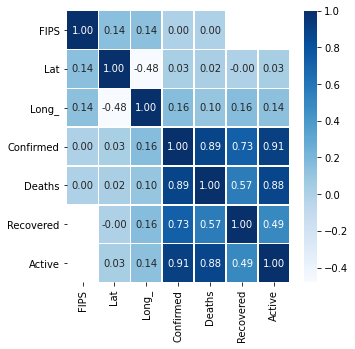

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(data=doc.corr(),annot=True, fmt='.2f',linewidths=0.5, cmap='Blues')